# Healthcare Lab (Time Series)

**Learning Objectives:**
  * Practice time series operations
  
  * Gain exposure to healthcare related DataSets

## Context of the dataset

### 1. The dataset is consisted of records corresponding to medical events.
### 2. Each medical event is uniquely identified by `MedicalClaim`.
### 3. A given medical event might involve several medical procedures.
### 4. Each medical procedure is uniquely identified by `ClaimItem`
### 5. A given medical procedure is characterized by `PrincipalDiagnosisDesc`,`PrincipalDiagnosis`,`RevenueCodeDesc`, `RevenueCode`, `TypeFlag` and `TotalExpenses`

### 6. Each medical procedure involves: `MemberName`,`MemberID`,`County`,`HospitalName`, `HospitalType`, `StartDate`,`EndDate`


## 1. Library Import

In [1]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
warnings.simplefilter('ignore')

## 2. Data loading and DataFrame creation

In [3]:
HealthCareDataSet=pd.read_csv("https://github.com/thousandoaks/Python4DS-I/raw/main/datasets/HealthcareDataset_PublicRelease.csv",sep=',',parse_dates=['StartDate','EndDate','BirthDate'])

In [4]:
HealthCareDataSet.head(3)

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,PrincipalDiagnosisDesc,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses
0,634363,e659f3f4,6a380a28,6f943458,c1e3436737c77899,18,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,15.148
1,634364,e659f3f4,6a380a28,6f943458,c1e3436737c77899,21,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,DRUGS REQUIRE SPECIFIC ID: DRUGS REQUIRING DET...,636.0,ER,1967-05-13,3.073
2,634387,e659f3f4,6a380a28,6f943458,c1e3436737c77899,10,04b77561,HOSPITAL,2020-01-08,2020-01-08,Epigastric pain,R10.13,LABORATORY - CLINICAL DIAGNOSTIC: HEMATOLOGY,305.0,ER,1967-05-13,123.900


In [5]:
HealthCareDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52563 entries, 0 to 52562
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Id                      52563 non-null  int64         
 1   MemberName              52563 non-null  object        
 2   MemberID                52563 non-null  object        
 3   County                  52563 non-null  object        
 4   MedicalClaim            52563 non-null  object        
 5   ClaimItem               52563 non-null  int64         
 6   HospitalName            52563 non-null  object        
 7   HospitalType            52563 non-null  object        
 8   StartDate               52563 non-null  datetime64[ns]
 9   EndDate                 52563 non-null  datetime64[ns]
 10  PrincipalDiagnosisDesc  52563 non-null  object        
 11  PrincipalDiagnosis      52563 non-null  object        
 12  RevenueCodeDesc         52561 non-null  object

## 3. Let's set 'StartDate' as the DataFrame index.
### Let's make sure that the index is sorted in ascending order

In [6]:
HealthCareDataSet.set_index('StartDate',inplace=True,drop=False)

In [7]:
HealthCareDataSet.sort_index(inplace=True)

In [8]:
HealthCareDataSet

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,PrincipalDiagnosisDesc,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses
StartDate,,,,,,,,,,,,,,,,,
2020-01-01,638036,588584f1,b9f9e2d3,02af982d,ca62615a0bdccc7b,2,88b42459,HOSPITAL,2020-01-01,2020-01-01,Unspecified sprain of rig,S63.501A,RADIOLOGY - DIAGNOSTIC,320.0,ER,1961-03-05,347.200
2020-01-01,637674,acfce739,5cbc6c2f,fd218584,630a117e55161ab1,12,446442f4,HOSPITAL,2020-01-01,2020-01-06,Sepsis due to Escherichia,A41.51,PHYSICAL THERAPY,420.0,INP,1943-08-04,727.650
2020-01-01,637675,acfce739,5cbc6c2f,fd218584,630a117e55161ab1,4,446442f4,HOSPITAL,2020-01-01,2020-01-06,Sepsis due to Escherichia,A41.51,MEDICAL/SURGICAL SUPPLIES: STERILE SUPPLIES,272.0,INP,1943-08-04,47.838
2020-01-01,637676,acfce739,5cbc6c2f,fd218584,630a117e55161ab1,7,446442f4,HOSPITAL,2020-01-01,2020-01-06,Sepsis due to Escherichia,A41.51,LABORATORY - CLINICAL DIAGNOSTIC: BACTERIOLOGY...,306.0,INP,1943-08-04,3864.525
2020-01-01,637677,acfce739,5cbc6c2f,fd218584,630a117e55161ab1,6,446442f4,HOSPITAL,2020-01-01,2020-01-06,Sepsis due to Escherichia,A41.51,LABORATORY - CLINICAL DIAGNOSTIC: HEMATOLOGY,305.0,INP,1943-08-04,1656.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,739937,84de8562,fcfa5992,e6708950,16725836ba8ad9fc,7,c7d474af,HOSPITAL,2020-12-31,2020-12-31,Headache unspecified,R51.9,LABORATORY - CLINICAL DIAGNOSTIC,300.0,ER,1950-07-08,128.100
2020-12-31,739938,84de8562,fcfa5992,e6708950,16725836ba8ad9fc,10,c7d474af,HOSPITAL,2020-12-31,2020-12-31,Headache unspecified,R51.9,CT SCAN: HEAD,351.0,ER,1950-07-08,2641.100
2020-12-31,739939,84de8562,fcfa5992,e6708950,16725836ba8ad9fc,12,c7d474af,HOSPITAL,2020-12-31,2020-12-31,Headache unspecified,R51.9,EMERGENCY ROOM,450.0,ER,1950-07-08,2388.400


## 3. Let's compute the age of the patient at the time of the medical event

In [9]:
HealthCareDataSet['AgeInDays']=HealthCareDataSet['StartDate']-HealthCareDataSet['BirthDate']


In [10]:
HealthCareDataSet[['BirthDate','StartDate','AgeInDays']]

,BirthDate,StartDate,AgeInDays
StartDate,,,
2020-01-01,1961-03-05,2020-01-01,21486 days
2020-01-01,1943-08-04,2020-01-01,27909 days
2020-01-01,1943-08-04,2020-01-01,27909 days
2020-01-01,1943-08-04,2020-01-01,27909 days
2020-01-01,1943-08-04,2020-01-01,27909 days
...,...,...,...
2020-12-31,1950-07-08,2020-12-31,25744 days
2020-12-31,1950-07-08,2020-12-31,25744 days
2020-12-31,1950-07-08,2020-12-31,25744 days


In [11]:
HealthCareDataSet['AgeInYears']=HealthCareDataSet['AgeInDays']/ np.timedelta64(1, 'Y')

In [12]:
HealthCareDataSet[['BirthDate','StartDate','AgeInDays','AgeInYears']]

,BirthDate,StartDate,AgeInDays,AgeInYears
StartDate,,,,
2020-01-01,1961-03-05,2020-01-01,21486 days,58.865753
2020-01-01,1943-08-04,2020-01-01,27909 days,76.463014
2020-01-01,1943-08-04,2020-01-01,27909 days,76.463014
2020-01-01,1943-08-04,2020-01-01,27909 days,76.463014
2020-01-01,1943-08-04,2020-01-01,27909 days,76.463014
...,...,...,...,...
2020-12-31,1950-07-08,2020-12-31,25744 days,70.531507
2020-12-31,1950-07-08,2020-12-31,25744 days,70.531507
2020-12-31,1950-07-08,2020-12-31,25744 days,70.531507


## 4. Let's compute the evolution of visits to Emergency Room Services accross  time (First Alternative)

In [13]:
HealthCareDataSet.head(2)

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,PrincipalDiagnosisDesc,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses,AgeInDays,AgeInYears
StartDate,,,,,,,,,,,,,,,,,,,
2020-01-01,638036,588584f1,b9f9e2d3,02af982d,ca62615a0bdccc7b,2,88b42459,HOSPITAL,2020-01-01,2020-01-01,Unspecified sprain of rig,S63.501A,RADIOLOGY - DIAGNOSTIC,320.0,ER,1961-03-05,347.20,21486 days,58.865753
2020-01-01,637674,acfce739,5cbc6c2f,fd218584,630a117e55161ab1,12,446442f4,HOSPITAL,2020-01-01,2020-01-06,Sepsis due to Escherichia,A41.51,PHYSICAL THERAPY,420.0,INP,1943-08-04,727.65,27909 days,76.463014


In [14]:
## We select ER related events
EmergencyRoomEvents=HealthCareDataSet[HealthCareDataSet['TypeFlag']=='ER']

In [15]:
EmergencyRoomEvents.head(10)

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,PrincipalDiagnosisDesc,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses,AgeInDays,AgeInYears
StartDate,,,,,,,,,,,,,,,,,,,
2020-01-01,638036,588584f1,b9f9e2d3,02af982d,ca62615a0bdccc7b,2,88b42459,HOSPITAL,2020-01-01,2020-01-01,Unspecified sprain of rig,S63.501A,RADIOLOGY - DIAGNOSTIC,320.0,ER,1961-03-05,347.200,21486 days,58.865753
2020-01-01,638059,588584f1,b9f9e2d3,02af982d,ca62615a0bdccc7b,1,88b42459,HOSPITAL,2020-01-01,2020-01-01,Unspecified sprain of rig,S63.501A,PHARMACY,250.0,ER,1961-03-05,0.364,21486 days,58.865753
2020-01-01,638109,588584f1,b9f9e2d3,02af982d,ca62615a0bdccc7b,5,88b42459,HOSPITAL,2020-01-01,2020-01-01,Unspecified sprain of rig,S63.501A,EMERGENCY ROOM,450.0,ER,1961-03-05,1232.700,21486 days,58.865753
2020-01-01,638110,588584f1,b9f9e2d3,02af982d,ca62615a0bdccc7b,3,88b42459,HOSPITAL,2020-01-01,2020-01-01,Unspecified sprain of rig,S63.501A,RADIOLOGY - DIAGNOSTIC,320.0,ER,1961-03-05,332.500,21486 days,58.865753
2020-01-01,635984,d24454b0,e410e149,425a37b2,ae1eacbd999dc461,1,2148dc02,HOSPITAL,2020-01-01,2020-01-01,Radiculopathy lumbar regi,M54.16,PHARMACY,250.0,ER,1951-04-07,11.830,25106 days,68.783562
2020-01-01,644736,7a1efee9,a44d084b,b021dd12,626dfafa329c08f3,1,f07b928c,HOSPITAL,2020-01-01,2020-01-01,Contusion of left foot in,S90.32XA,PHARMACY,250.0,ER,1965-02-15,0.770,20043 days,54.912329
2020-01-01,644735,7a1efee9,a44d084b,b021dd12,626dfafa329c08f3,3,f07b928c,HOSPITAL,2020-01-01,2020-01-01,Contusion of left foot in,S90.32XA,EMERGENCY ROOM,450.0,ER,1965-02-15,1146.600,20043 days,54.912329
2020-01-01,644709,7a1efee9,a44d084b,b021dd12,626dfafa329c08f3,2,f07b928c,HOSPITAL,2020-01-01,2020-01-01,Contusion of left foot in,S90.32XA,RADIOLOGY - DIAGNOSTIC,320.0,ER,1965-02-15,487.200,20043 days,54.912329
2020-01-01,638111,588584f1,b9f9e2d3,02af982d,ca62615a0bdccc7b,4,88b42459,HOSPITAL,2020-01-01,2020-01-01,Unspecified sprain of rig,S63.501A,RADIOLOGY - DIAGNOSTIC,320.0,ER,1961-03-05,345.800,21486 days,58.865753


In [16]:
## Each MedicalClaim has several entries associated, we consider just one entry per MedicalClaim to avoid double counting

EmergencyRoomEventsNoDuplicates=EmergencyRoomEvents[['MedicalClaim','TypeFlag']].drop_duplicates()

In [17]:
EmergencyRoomEventsNoDuplicates.head(10)

,MedicalClaim,TypeFlag
StartDate,,
2020-01-01,ca62615a0bdccc7b,ER
2020-01-01,ae1eacbd999dc461,ER
2020-01-01,626dfafa329c08f3,ER
2020-01-01,ee2f34246400aee6,ER
2020-01-01,13bbd233062d8d6a,ER
2020-01-02,6da791edbf420aeb,ER
2020-01-02,f7aaf626f5c29df6,ER
2020-01-02,79b95bffa30ce9e8,ER
2020-01-02,9444444a14842996,ER


In [18]:
EmergencyRoomEventsNoDuplicatesResampledMonthly=EmergencyRoomEventsNoDuplicates['TypeFlag'].resample('30D').count()

<Axes: xlabel='StartDate', ylabel='TypeFlag'>

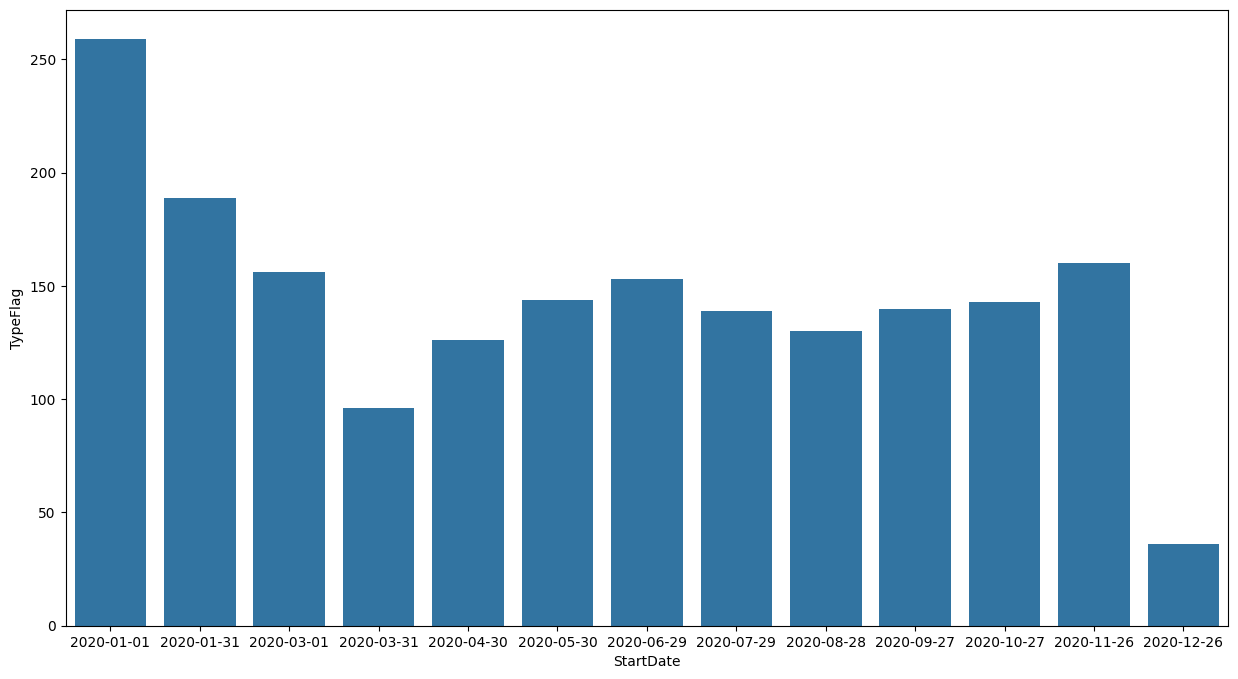

In [19]:
plt.figure(figsize=(15,8))
sns.barplot(EmergencyRoomEventsNoDuplicatesResampledMonthly.reset_index(),x='StartDate', y="TypeFlag")

## 5. Let's compute the evolution of visits to Emergency Room Services accross  time (Second Alternative)
### We can rely on groupby operations to process TimeSeries. In this case we need to group by several columns: `MedicalClaim`, `TypeFlag` and `StartDate`

In [20]:
HealthCareDataSet.head(10)

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,PrincipalDiagnosisDesc,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses,AgeInDays,AgeInYears
StartDate,,,,,,,,,,,,,,,,,,,
2020-01-01,638036,588584f1,b9f9e2d3,02af982d,ca62615a0bdccc7b,2,88b42459,HOSPITAL,2020-01-01,2020-01-01,Unspecified sprain of rig,S63.501A,RADIOLOGY - DIAGNOSTIC,320.0,ER,1961-03-05,347.200,21486 days,58.865753
2020-01-01,637674,acfce739,5cbc6c2f,fd218584,630a117e55161ab1,12,446442f4,HOSPITAL,2020-01-01,2020-01-06,Sepsis due to Escherichia,A41.51,PHYSICAL THERAPY,420.0,INP,1943-08-04,727.650,27909 days,76.463014
2020-01-01,637675,acfce739,5cbc6c2f,fd218584,630a117e55161ab1,4,446442f4,HOSPITAL,2020-01-01,2020-01-06,Sepsis due to Escherichia,A41.51,MEDICAL/SURGICAL SUPPLIES: STERILE SUPPLIES,272.0,INP,1943-08-04,47.838,27909 days,76.463014
2020-01-01,637676,acfce739,5cbc6c2f,fd218584,630a117e55161ab1,7,446442f4,HOSPITAL,2020-01-01,2020-01-06,Sepsis due to Escherichia,A41.51,LABORATORY - CLINICAL DIAGNOSTIC: BACTERIOLOGY...,306.0,INP,1943-08-04,3864.525,27909 days,76.463014
2020-01-01,637677,acfce739,5cbc6c2f,fd218584,630a117e55161ab1,6,446442f4,HOSPITAL,2020-01-01,2020-01-06,Sepsis due to Escherichia,A41.51,LABORATORY - CLINICAL DIAGNOSTIC: HEMATOLOGY,305.0,INP,1943-08-04,1656.375,27909 days,76.463014
2020-01-01,637678,acfce739,5cbc6c2f,fd218584,630a117e55161ab1,2,446442f4,HOSPITAL,2020-01-01,2020-01-06,Sepsis due to Escherichia,A41.51,PHARMACY,250.0,INP,1943-08-04,220.920,27909 days,76.463014
2020-01-01,637679,acfce739,5cbc6c2f,fd218584,630a117e55161ab1,8,446442f4,HOSPITAL,2020-01-01,2020-01-06,Sepsis due to Escherichia,A41.51,LABORATORY - CLINICAL DIAGNOSTIC: UROLOGY,307.0,INP,1943-08-04,392.000,27909 days,76.463014
2020-01-01,637680,acfce739,5cbc6c2f,fd218584,630a117e55161ab1,9,446442f4,HOSPITAL,2020-01-01,2020-01-06,Sepsis due to Escherichia,A41.51,RADIOLOGY - DIAGNOSTIC: CHEST X-RAY,324.0,INP,1943-08-04,890.925,27909 days,76.463014
2020-01-01,637681,acfce739,5cbc6c2f,fd218584,630a117e55161ab1,10,446442f4,HOSPITAL,2020-01-01,2020-01-06,Sepsis due to Escherichia,A41.51,CT SCAN,350.0,INP,1943-08-04,35962.675,27909 days,76.463014


In [21]:
EmergencyRoomEventsNoDuplicates=EmergencyRoomEvents[['MedicalClaim','TypeFlag']].drop_duplicates()

In [22]:
EmergencyRoomEventsNoDuplicates.reset_index(inplace=True)

In [23]:
EmergencyRoomEventsNoDuplicates

,StartDate,MedicalClaim,TypeFlag
0,2020-01-01,ca62615a0bdccc7b,ER
1,2020-01-01,ae1eacbd999dc461,ER
2,2020-01-01,626dfafa329c08f3,ER
3,2020-01-01,ee2f34246400aee6,ER
4,2020-01-01,13bbd233062d8d6a,ER
...,...,...,...
1866,2020-12-31,93ac7eb84b945109,ER
1867,2020-12-31,16725836ba8ad9fc,ER
1868,2020-12-31,06758baea5cf49f5,ER
1869,2020-12-31,10d4633bd8f060cb,ER


In [24]:
EmergencyRoomEventsNoDuplicatesGroupedMonthly=EmergencyRoomEventsNoDuplicates.groupby(['TypeFlag',pd.Grouper(key='StartDate',freq='30D')]).count()

In [25]:
EmergencyRoomEventsNoDuplicatesGroupedMonthly

MedicalClaim
TypeFlag StartDate               
ER       2020-01-01           259
         2020-01-31           189
         2020-03-01           156
         2020-03-31            96
         2020-04-30           126
         2020-05-30           144
         2020-06-29           153
         2020-07-29           139
         2020-08-28           130
         2020-09-27           140
         2020-10-27           143
         2020-11-26           160
         2020-12-26            36

<Axes: xlabel='StartDate', ylabel='MedicalClaim'>

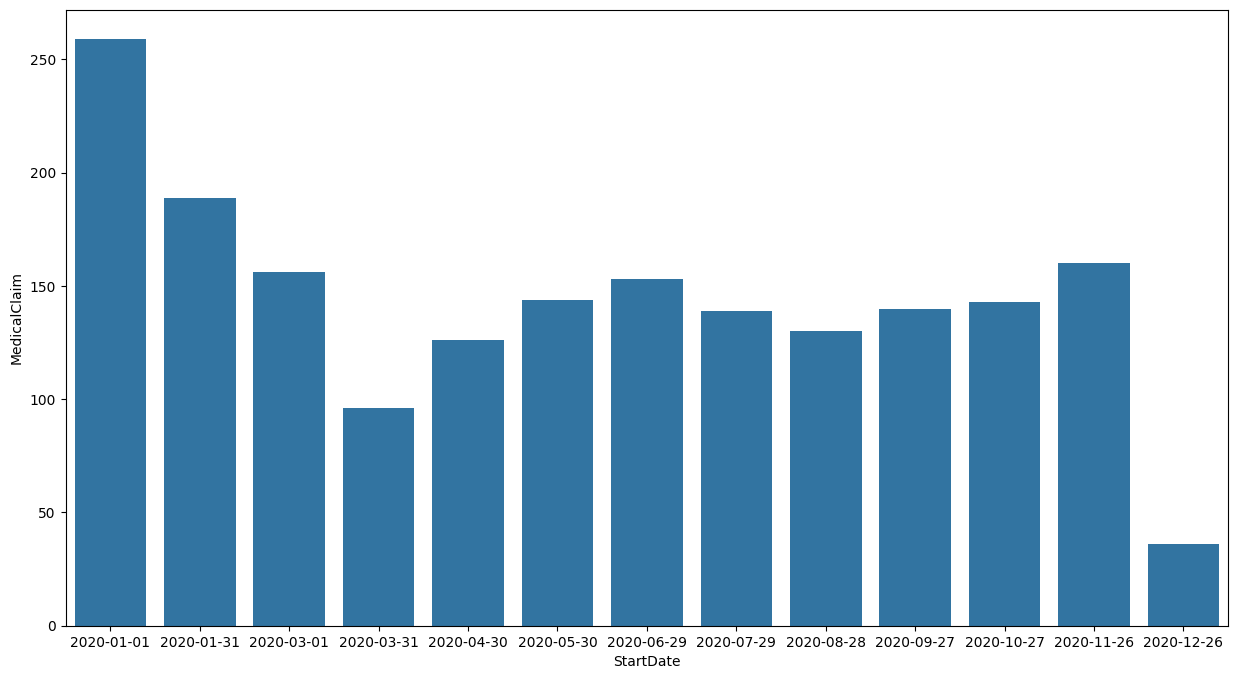

In [26]:
plt.figure(figsize=(15,8))
sns.barplot(EmergencyRoomEventsNoDuplicatesGroupedMonthly.reset_index(),x='StartDate', y="MedicalClaim")

## 6. Let's compute the evolution of costs accross  time

In [27]:
HealthCareDataSet.head(10)

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,PrincipalDiagnosisDesc,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses,AgeInDays,AgeInYears
StartDate,,,,,,,,,,,,,,,,,,,
2020-01-01,638036,588584f1,b9f9e2d3,02af982d,ca62615a0bdccc7b,2,88b42459,HOSPITAL,2020-01-01,2020-01-01,Unspecified sprain of rig,S63.501A,RADIOLOGY - DIAGNOSTIC,320.0,ER,1961-03-05,347.200,21486 days,58.865753
2020-01-01,637674,acfce739,5cbc6c2f,fd218584,630a117e55161ab1,12,446442f4,HOSPITAL,2020-01-01,2020-01-06,Sepsis due to Escherichia,A41.51,PHYSICAL THERAPY,420.0,INP,1943-08-04,727.650,27909 days,76.463014
2020-01-01,637675,acfce739,5cbc6c2f,fd218584,630a117e55161ab1,4,446442f4,HOSPITAL,2020-01-01,2020-01-06,Sepsis due to Escherichia,A41.51,MEDICAL/SURGICAL SUPPLIES: STERILE SUPPLIES,272.0,INP,1943-08-04,47.838,27909 days,76.463014
2020-01-01,637676,acfce739,5cbc6c2f,fd218584,630a117e55161ab1,7,446442f4,HOSPITAL,2020-01-01,2020-01-06,Sepsis due to Escherichia,A41.51,LABORATORY - CLINICAL DIAGNOSTIC: BACTERIOLOGY...,306.0,INP,1943-08-04,3864.525,27909 days,76.463014
2020-01-01,637677,acfce739,5cbc6c2f,fd218584,630a117e55161ab1,6,446442f4,HOSPITAL,2020-01-01,2020-01-06,Sepsis due to Escherichia,A41.51,LABORATORY - CLINICAL DIAGNOSTIC: HEMATOLOGY,305.0,INP,1943-08-04,1656.375,27909 days,76.463014
2020-01-01,637678,acfce739,5cbc6c2f,fd218584,630a117e55161ab1,2,446442f4,HOSPITAL,2020-01-01,2020-01-06,Sepsis due to Escherichia,A41.51,PHARMACY,250.0,INP,1943-08-04,220.920,27909 days,76.463014
2020-01-01,637679,acfce739,5cbc6c2f,fd218584,630a117e55161ab1,8,446442f4,HOSPITAL,2020-01-01,2020-01-06,Sepsis due to Escherichia,A41.51,LABORATORY - CLINICAL DIAGNOSTIC: UROLOGY,307.0,INP,1943-08-04,392.000,27909 days,76.463014
2020-01-01,637680,acfce739,5cbc6c2f,fd218584,630a117e55161ab1,9,446442f4,HOSPITAL,2020-01-01,2020-01-06,Sepsis due to Escherichia,A41.51,RADIOLOGY - DIAGNOSTIC: CHEST X-RAY,324.0,INP,1943-08-04,890.925,27909 days,76.463014
2020-01-01,637681,acfce739,5cbc6c2f,fd218584,630a117e55161ab1,10,446442f4,HOSPITAL,2020-01-01,2020-01-06,Sepsis due to Escherichia,A41.51,CT SCAN,350.0,INP,1943-08-04,35962.675,27909 days,76.463014


In [28]:
HealthCareDataSet['TotalExpenses'].resample('30D').sum()

StartDate
2020-01-01    1.519038e+07
2020-01-31    1.122667e+07
2020-03-01    1.161758e+07
2020-03-31    8.691792e+06
2020-04-30    1.065927e+07
2020-05-30    1.208040e+07
2020-06-29    1.438316e+07
2020-07-29    1.181979e+07
2020-08-28    9.377434e+06
2020-09-27    1.488580e+07
2020-10-27    1.261137e+07
2020-11-26    1.040729e+07
2020-12-26    8.209635e+05
Freq: 30D, Name: TotalExpenses, dtype: float64

<Axes: xlabel='StartDate', ylabel='TotalExpenses'>

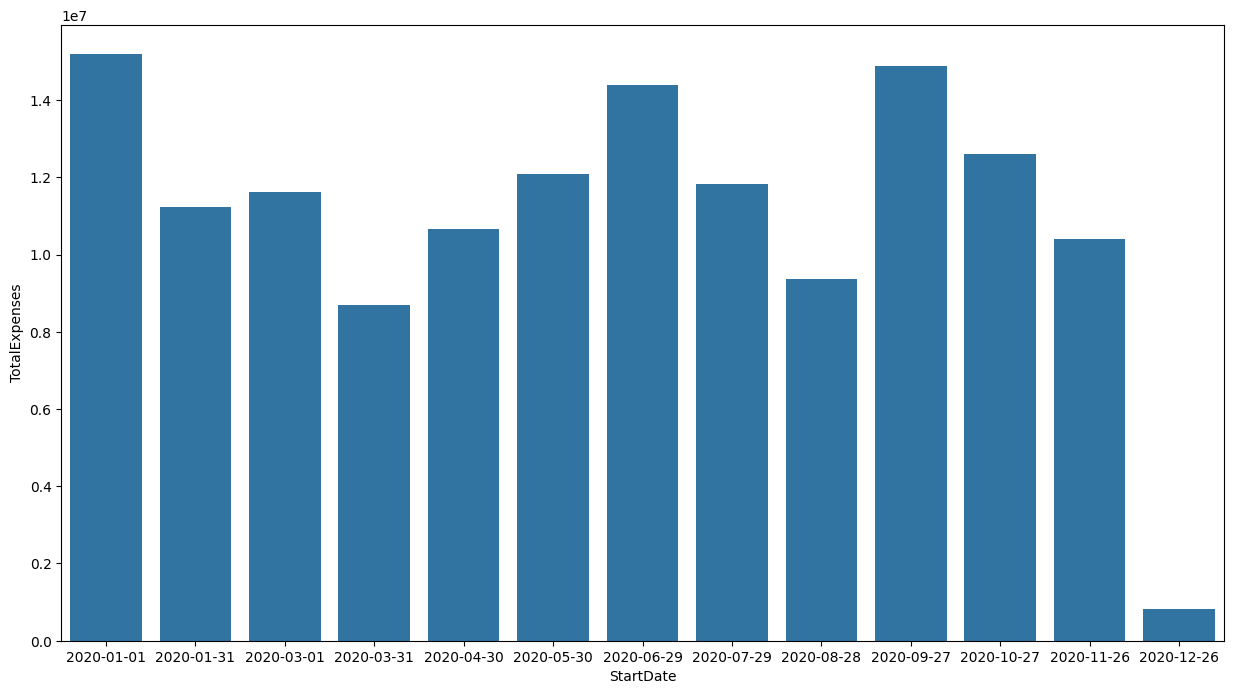

In [29]:
plt.figure(figsize=(15,8))
sns.barplot(HealthCareDataSet['TotalExpenses'].resample('30D').sum())

## 7. Let's compute the evolution of costs accross  time and county

In [30]:
HealthCareDataSet.head(3)

,Id,MemberName,MemberID,County,MedicalClaim,ClaimItem,HospitalName,HospitalType,StartDate,EndDate,PrincipalDiagnosisDesc,PrincipalDiagnosis,RevenueCodeDesc,RevenueCode,TypeFlag,BirthDate,TotalExpenses,AgeInDays,AgeInYears
StartDate,,,,,,,,,,,,,,,,,,,
2020-01-01,638036,588584f1,b9f9e2d3,02af982d,ca62615a0bdccc7b,2,88b42459,HOSPITAL,2020-01-01,2020-01-01,Unspecified sprain of rig,S63.501A,RADIOLOGY - DIAGNOSTIC,320.0,ER,1961-03-05,347.200,21486 days,58.865753
2020-01-01,637674,acfce739,5cbc6c2f,fd218584,630a117e55161ab1,12,446442f4,HOSPITAL,2020-01-01,2020-01-06,Sepsis due to Escherichia,A41.51,PHYSICAL THERAPY,420.0,INP,1943-08-04,727.650,27909 days,76.463014
2020-01-01,637675,acfce739,5cbc6c2f,fd218584,630a117e55161ab1,4,446442f4,HOSPITAL,2020-01-01,2020-01-06,Sepsis due to Escherichia,A41.51,MEDICAL/SURGICAL SUPPLIES: STERILE SUPPLIES,272.0,INP,1943-08-04,47.838,27909 days,76.463014


In [31]:
HealthCareDataSet.groupby(['County',pd.Grouper(key='StartDate',freq='30D')])['TotalExpenses'].sum()

County    StartDate 
02af982d  2020-01-01    6581617.378
          2020-01-31    4900636.776
          2020-03-01    5268470.739
          2020-03-31    5402999.322
          2020-04-30    6200819.674
                           ...     
fd218584  2020-08-28    1129774.709
          2020-09-27    1800753.717
          2020-10-27    1756825.784
          2020-11-26    1156537.410
          2020-12-26     151433.338
Name: TotalExpenses, Length: 175, dtype: float64

In [32]:
HealthCareDataSetGroupedByCountyAndQuarter=HealthCareDataSet.groupby(['County',pd.Grouper(key='StartDate',freq='90D')])['TotalExpenses'].sum().reset_index()
HealthCareDataSetGroupedByCountyAndQuarter

,County,StartDate,TotalExpenses
0,02af982d,2020-01-01,1.675072e+07
1,02af982d,2020-03-31,1.788414e+07
2,02af982d,2020-06-29,1.701746e+07
3,02af982d,2020-09-27,1.764098e+07
4,02af982d,2020-12-26,3.647526e+05
...,...,...,...
70,fd218584,2020-01-01,4.578161e+06
71,fd218584,2020-03-31,3.451579e+06
72,fd218584,2020-06-29,3.518160e+06
73,fd218584,2020-09-27,4.714117e+06


[None]

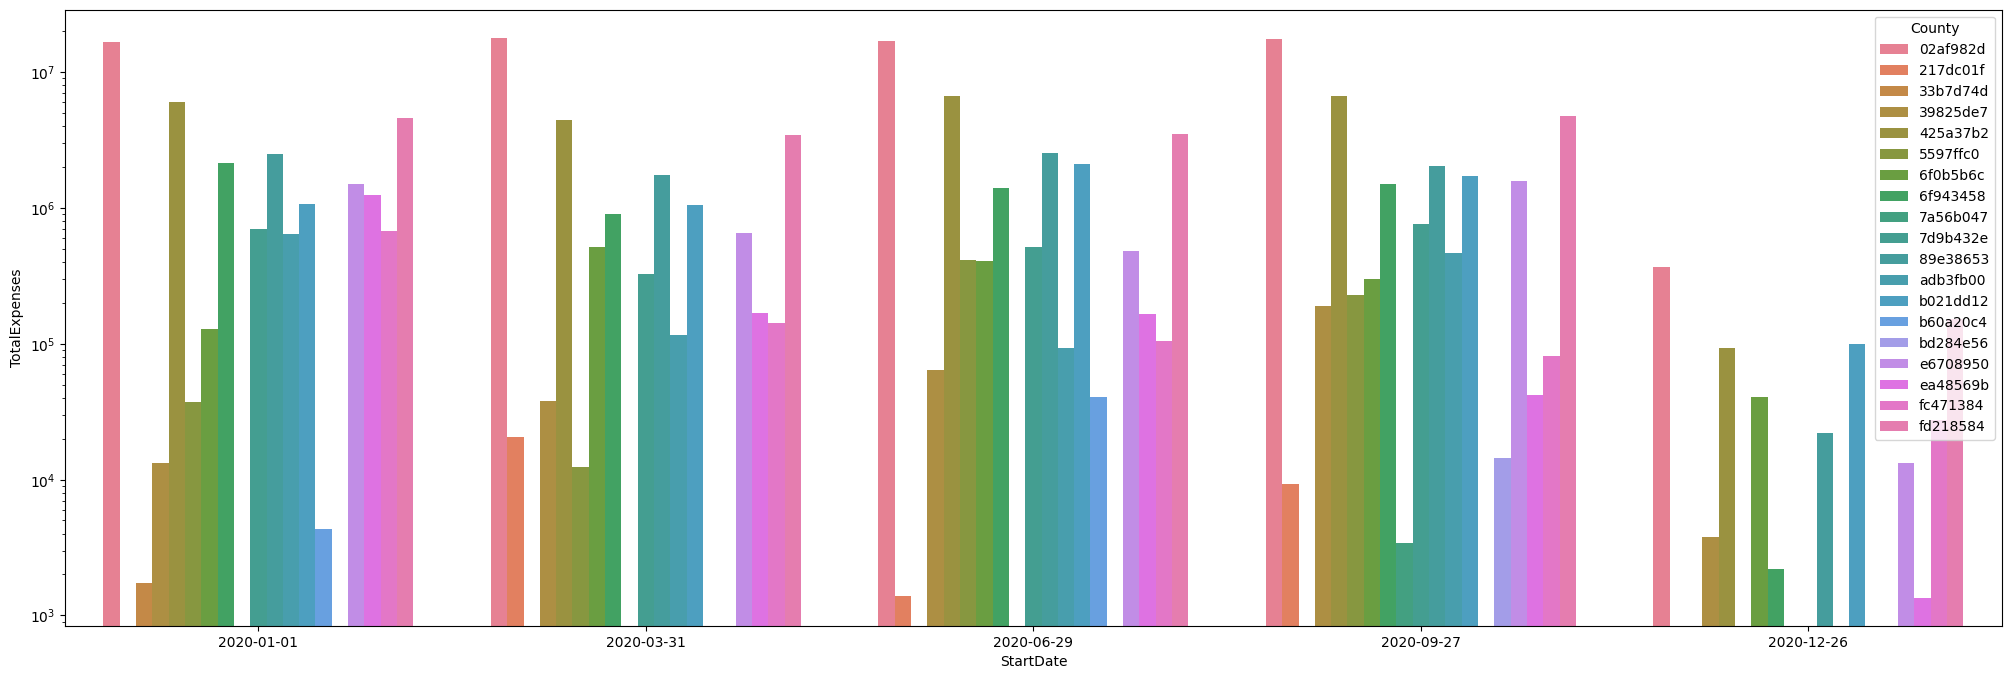

In [37]:

plt.figure(figsize=(25,8))
ax=sns.barplot(data=HealthCareDataSetGroupedByCountyAndQuarter, x="StartDate", y="TotalExpenses", hue="County")
ax.set(yscale='log')